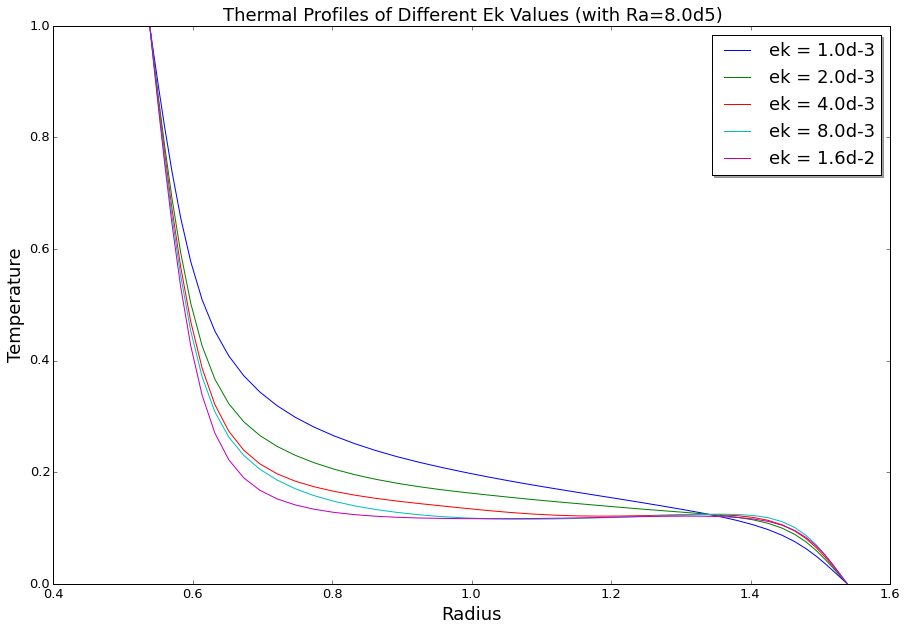

In [5]:
from  rayleigh_diagnostics  import Shell_Avgs, build_file_list
import matplotlib.pyplot as plt
import numpy

%matplotlib inline

sizetuple=(15,10)
ra_list = ['ek = 1.0d-3','ek = 2.0d-3','ek = 4.0d-3','ek = 8.0d-3','ek = 1.6d-2']

# Build a list of all files ranging from iteration 0 million to 1 million
fig, ax = plt.subplots(figsize=sizetuple)

for x in range(5):
    files = build_file_list(0,1000000,path='Shell_Avgs'+str(x+1))
    a = Shell_Avgs(filename=files[0], path='')

    nfiles = len(files)

    nr = a.nr
    nq = a.nq
    nmom = 4
    niter = a.niter
    radius = a.radius
    savg=numpy.zeros((nr,nmom,nq),dtype='float64')
    for i in range(niter):
        savg[:,:,:] += a.vals[:,:,:,i]
    savg = savg*(1.0/niter)

    lut = a.lut
    thermal = lut[501] # Temperature


    
    ax.plot(radius,savg[:,0,thermal],label=ra_list[x])
    # ax.plot(radius,savg[:,1,thermal]*10, label='Temperature (standard dev.)')
    
ax.legend(shadow=True,loc='upper right',fontsize=18)
ax.set_xlabel('Radius',fontsize=18)
ax.set_ylabel('Temperature',fontsize=18)
ax.set_title('Thermal Profiles of Different Ek Values (with Ra=8.0d5)',fontsize=18)
plt.ylim((0,1.0))
# ax.grid(color='black', linestyle='-', linewidth=0.1)
plt.tick_params(labelsize=13)


plt.show()